# Stroke Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
#read data
stroke=pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
#replace null values with the mean
stroke['bmi'].fillna(stroke['bmi'].mean(),inplace=True)

In [6]:
stroke.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Data Cleaning

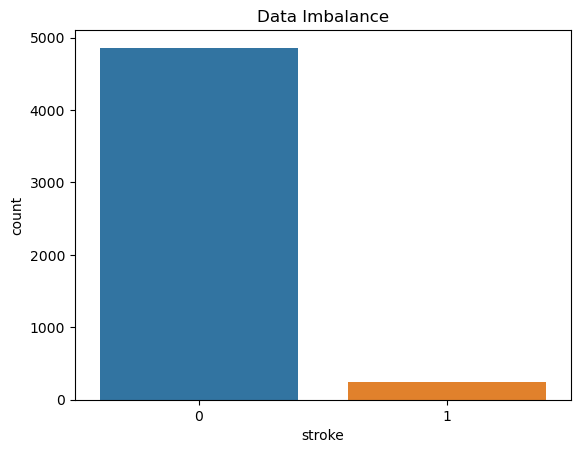

In [7]:
import seaborn as sns
sns.countplot(data=stroke , x='stroke')
plt.title("Data Imbalance")
plt.show()

In [8]:
stroke_1=stroke[stroke.stroke==1]
stroke_1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [9]:
stroke_0=stroke[stroke.stroke==0]
stroke_0.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [10]:
from sklearn.utils import resample
stroke_upsampled = resample(stroke_1, replace=True, n_samples=(len(stroke_0) - len(stroke_1)))
stroke_upsampled.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
60,10710,Female,56.0,0,0,Yes,Private,Urban,185.17,40.4,formerly smoked,1
38,47306,Male,58.0,0,0,No,Private,Rural,92.62,32.0,Unknown,1
34,14248,Male,48.0,0,0,No,Govt_job,Urban,84.20,29.7,never smoked,1
80,57419,Male,59.0,0,0,Yes,Private,Rural,96.16,44.1,Unknown,1
204,62019,Male,54.0,0,0,Yes,Govt_job,Rural,87.85,31.1,smokes,1


In [11]:
stroke_1 = pd.concat([stroke_1, stroke_upsampled])
stroke_1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25,70822,Male,80.0,0,0,Yes,Self-employed,Rural,104.12,23.500000,never smoked,1
154,56939,Female,55.0,0,0,Yes,Self-employed,Rural,92.98,25.600000,never smoked,1
198,18937,Male,79.0,0,0,Yes,Private,Rural,114.77,28.893237,formerly smoked,1
73,50784,Male,63.0,0,0,Yes,Private,Rural,228.56,27.400000,never smoked,1


In [12]:
df = pd.concat([stroke_0, stroke_1], ignore_index=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.000000,Unknown,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.200000,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.600000,Unknown,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.900000,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.100000,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9717,70822,Male,80.0,0,0,Yes,Self-employed,Rural,104.12,23.500000,never smoked,1
9718,56939,Female,55.0,0,0,Yes,Self-employed,Rural,92.98,25.600000,never smoked,1
9719,18937,Male,79.0,0,0,Yes,Private,Rural,114.77,28.893237,formerly smoked,1
9720,50784,Male,63.0,0,0,Yes,Private,Rural,228.56,27.400000,never smoked,1


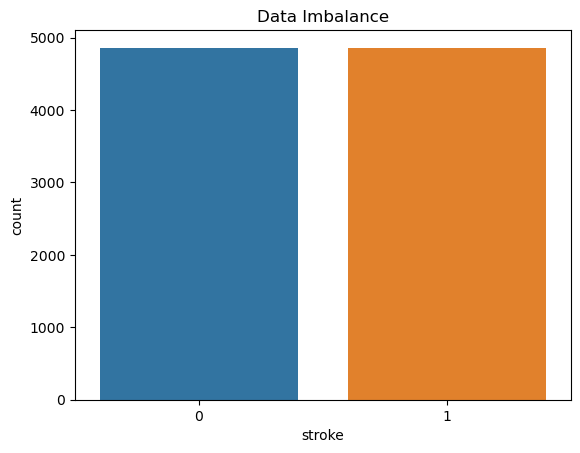

In [13]:
sns.countplot(data=df , x='stroke')
plt.title("Data Imbalance")
plt.show()

In [14]:
df.drop('id', axis=1 ,inplace=True)

In [15]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


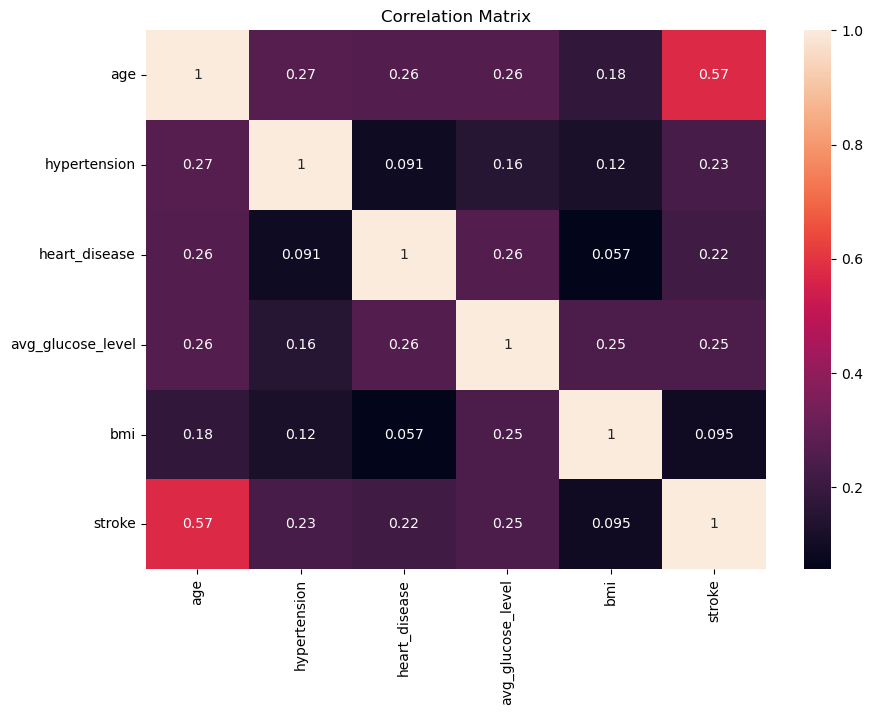

In [16]:
_, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(data=df.corr(numeric_only=True), annot=True, ax=ax)
plt.title('Correlation Matrix')
plt.show()

## ML model

In [17]:
df = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'ever_married', 'work_type', 'smoking_status', 'stroke']]
df

,age,hypertension,heart_disease,avg_glucose_level,ever_married,work_type,smoking_status,stroke
0,3.0,0,0,95.12,No,children,Unknown,0
1,58.0,1,0,87.96,Yes,Private,never smoked,0
2,8.0,0,0,110.89,No,Private,Unknown,0
3,70.0,0,0,69.04,Yes,Private,formerly smoked,0
4,14.0,0,0,161.28,No,Never_worked,Unknown,0
...,...,...,...,...,...,...,...,...
9717,80.0,0,0,104.12,Yes,Self-employed,never smoked,1
9718,55.0,0,0,92.98,Yes,Self-employed,never smoked,1
9719,79.0,0,0,114.77,Yes,Private,formerly smoked,1
9720,63.0,0,0,228.56,Yes,Private,never smoked,1


In [18]:
df=pd.get_dummies(df)
df

,age,hypertension,heart_disease,avg_glucose_level,stroke,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,0,1,0,0,0,0,0,1,1,0,0,0
1,58.0,1,0,87.96,0,0,1,0,0,1,0,0,0,0,1,0
2,8.0,0,0,110.89,0,1,0,0,0,1,0,0,1,0,0,0
3,70.0,0,0,69.04,0,0,1,0,0,1,0,0,0,1,0,0
4,14.0,0,0,161.28,0,1,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,80.0,0,0,104.12,1,0,1,0,0,0,1,0,0,0,1,0
9718,55.0,0,0,92.98,1,0,1,0,0,0,1,0,0,0,1,0
9719,79.0,0,0,114.77,1,0,1,0,0,1,0,0,0,1,0,0
9720,63.0,0,0,228.56,1,0,1,0,0,1,0,0,0,0,1,0


In [19]:
X = df.drop('stroke', axis=1)
y = df.stroke

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [23]:
# Random forest

models=dict()
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
models['Random Forest'] = accuracy_score(y_pred, y_test)

In [24]:
#logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
models['Logistic Regression'] = accuracy_score(y_pred, y_test)

In [25]:
models

{'Random Forest': 0.9804627249357326, 'Logistic Regression': 0.8}

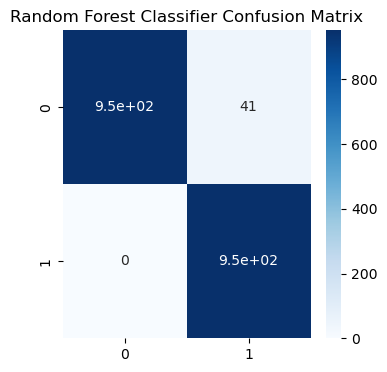

In [26]:

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, ax=ax, cmap='Blues')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()